In [27]:
import cv2

# Load the input image
input_image = cv2.imread('/content/im1.jpg')



In [28]:
import numpy as np

# Convert the image to grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with maximum area
max_contour = max(contours, key=cv2.contourArea)

# Create a mask for the contour with the maximum area
mask = np.zeros_like(gray_image)
cv2.drawContours(mask, [max_contour], 0, 255, -1)

# Apply the mask to the input image to remove the background
output_image = cv2.bitwise_and(input_image, input_image, mask=mask)

# Save the output image
cv2.imwrite('image.jpg', output_image)

True

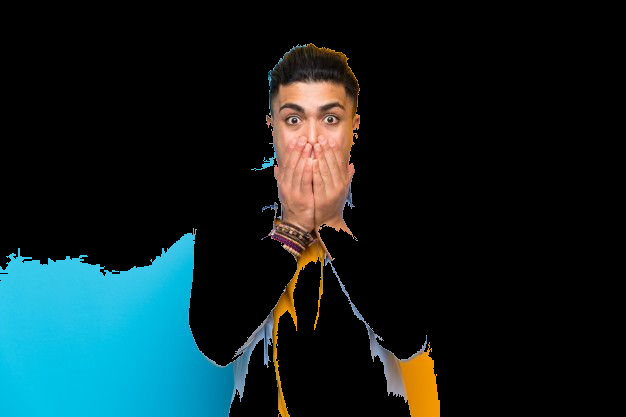

In [29]:
# Display the output image
from google.colab.patches import cv2_imshow

cv2_imshow(output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()